In [ ]:
import pandas_datareader as pdr

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 486 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


**Importing dependencies**

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [ ]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=2000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

Official name of the Netflix at the stock market: 'NFLX'

In [ ]:
data = yf.download('NFLX', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

Explicitly stating the columns of the dataframe

In [ ]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

           Date        Open        High         Low       Close   Adj Close  \
1375 2022-11-17  294.720001  299.820007  291.000000  295.279999  295.279999   
1376 2022-11-18  297.329987  298.000000  287.000000  287.980011  287.980011   
1377 2022-11-21  291.000000  291.869995  282.660004  285.049988  285.049988   
1378 2022-11-22  284.989990  286.980011  277.339996  286.690002  286.690002   
1379 2022-11-23  285.910004  292.470001  283.760010  291.500000  291.500000   

       Volume  
1375  9838200  
1376  8392100  
1377  7256500  
1378  6245100  
1379  5913200  


Choosing "The closing price" as a variable of interest

In [ ]:
data_final=data.reset_index()['Close']

In [ ]:
data_final

0       165.059998
1       165.169998
2       165.610001
3       165.880005
4       158.029999
           ...    
1375    295.279999
1376    287.980011
1377    285.049988
1378    286.690002
1379    291.500000
Name: Close, Length: 1380, dtype: float64

Visualizing the closing price from today to 1400 days back.

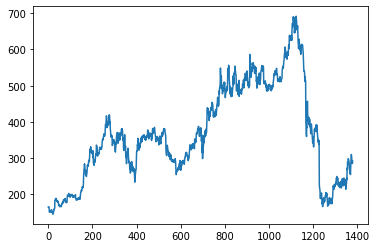

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data_final)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_final= scaler.fit_transform(np.array(data_final).reshape(-1,1))

In [ ]:
print(data_final)

[[0.03462751]
 [0.03482915]
 [0.03563573]
 ...
 [0.25458276]
 [0.2575891 ]
 [0.26640637]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(data_final)*0.65)
test_size=len(data_final)-training_size
train_data,test_data=data_final[0:training_size,:],data_final[training_size:len(data_final),:1]

In [ ]:
training_size,test_size

(897, 483)

In [ ]:
train_data

array([[3.46275100e-02],
       [3.48291536e-02],
       [3.56357279e-02],
       [3.61306763e-02],
       [2.17407254e-02],
       [9.66051516e-03],
       [1.20068980e-02],
       [1.10536712e-02],
       [1.02470969e-02],
       [1.13836462e-02],
       [1.32534017e-02],
       [1.07787154e-02],
       [1.62413854e-02],
       [1.59847506e-02],
       [2.17224043e-02],
       [2.07691776e-02],
       [8.90893198e-03],
       [1.32717507e-02],
       [7.18580096e-03],
       [5.93929731e-03],
       [0.00000000e+00],
       [2.63968769e-03],
       [1.46652424e-04],
       [7.35077445e-03],
       [1.19152367e-02],
       [1.49582116e-02],
       [2.30605692e-02],
       [2.20707003e-02],
       [2.74050389e-02],
       [2.84682480e-02],
       [6.86134471e-02],
       [6.90900465e-02],
       [6.86134471e-02],
       [7.76690035e-02],
       [7.65141611e-02],
       [7.47910301e-02],
       [7.86589004e-02],
       [6.69269582e-02],
       [6.94199934e-02],
       [6.50572027e-02],


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
import numpy as np

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape),print(y_train.shape)

(796, 100)
(796,)


(None, None)

In [ ]:
print(X_test.shape),print(y_test.shape)

(382, 100)
(382,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=90,batch_size=70,verbose=1)

Epoch 1/90
12/12 [==============================] - 13s 353ms/step - loss: 0.0349 - val_loss: 0.0314
Epoch 2/90
12/12 [==============================] - 2s 160ms/step - loss: 0.0081 - val_loss: 0.0126
Epoch 3/90
12/12 [==============================] - 2s 158ms/step - loss: 0.0042 - val_loss: 0.0106
Epoch 4/90
12/12 [==============================] - 2s 197ms/step - loss: 0.0026 - val_loss: 0.0074
Epoch 5/90
12/12 [==============================] - 3s 254ms/step - loss: 0.0020 - val_loss: 0.0057
Epoch 6/90
12/12 [==============================] - 3s 276ms/step - loss: 0.0018 - val_loss: 0.0057
Epoch 7/90
12/12 [==============================] - 3s 248ms/step - loss: 0.0018 - val_loss: 0.0058
Epoch 8/90
12/12 [==============================] - 2s 160ms/step - loss: 0.0018 - val_loss: 0.0058
Epoch 9/90
12/12 [==============================] - 2s 159ms/step - loss: 0.0017 - val_loss: 0.0055
Epoch 10/90
12/12 [==============================] - 2s 159ms/step - loss: 0.0017 - val_loss: 0.005

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict= model.predict(X_test)

12/12 [==============================] - 0s 29ms/step


In [ ]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [ ]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

365.42903900259205

In [ ]:
scaler.inverse_transform(y_train.reshape(-1, 1)).shape

(796, 1)

In [ ]:

print(mean_absolute_error(scaler.inverse_transform(y_train.reshape(-1, 1)),train_predict))

9.076282098664711


In [ ]:
print(mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)),test_predict))

12.48067514309708


In [ ]:
a,b=scaler.inverse_transform(y_test.reshape(-1, 1)).ravel(),test_predict.ravel()
mean_absolute_percentage_error=0
for i in range(len(a)):
   mean_absolute_percentage_error+= (abs(a[i]-b[i])/a[i])**2 /len(a)

In [ ]:
mean_absolute_percentage_error**0.5

0.06520179875942307

In [ ]:
test_predict.ravel().shape

(382,)

In [ ]:
print(mean_absolute_error(y_test,test_predict))

406.9138362230755


In [ ]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

438.93498985015214

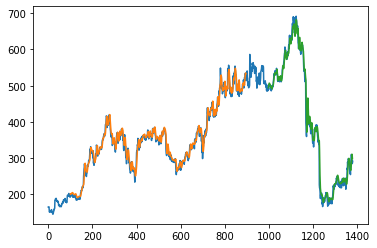

In [ ]:
### Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(data_final)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# Shift test predictions for plotting
testPredictPlot= np.empty_like(data_final)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_final)-1, :] = test_predict
# Plot Baseline and predictions
plt.plot(scaler.inverse_transform(data_final))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

483

In [ ]:
# From test_data take the previous 100 trading days as e reference for forecasting
x_input=test_data[383:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.06945666353735436,
 0.07900719637402931,
 0.07480935114931392,
 0.057138139618757966,
 0.05184044316947245,
 0.0557083134470539,
 0.05244537392997645,
 0.07871389152570801,
 0.08203182220545946,
 0.10166447844168808,
 0.1288128826112937,
 0.14245125037624612,
 0.13614533599278728,
 0.13260741269124987,
 0.12417510808518617,
 0.147712276726719,
 0.14637411181650162,
 0.14432100584934227,
 0.1467224078274969,
 0.13794177923934803,
 0.1476756066279064,
 0.15350492161116053,
 0.14776726788939304,
 0.16006747074412808,
 0.15355991277383452,
 0.1795351255212448,
 0.17695042899120672,
 0.18904898825910704,
 0.18870069224811176,
 0.1824314479634655,
 0.17410909771166,
 0.18147822119196616,
 0.17412744674661124,
 0.14732731061691107,
 0.14367943296111552,
 0.15295498201333052,
 0.1609656783818635,
 0.14135137118058616,
 0.14371610305992816,
 0.13653027413150537,
 0.14186464067960353,
 0.15374320732571795,
 0.14653908530452364,
 0.13238744804055386,
 0.15176346952727376,
 0.14897712941040103,

In [ ]:
# Demonstrate prediction for next 4 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<5):

    if len(temp_input)>100:
        if(len(temp_input)>100):
        #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
        #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
    else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1

print(lst_output)

[0.25676176]
101
1 day input [0.0790072  0.07480935 0.05713814 0.05184044 0.05570831 0.05244537
 0.07871389 0.08203182 0.10166448 0.12881288 0.14245125 0.13614534
 0.13260741 0.12417511 0.14771228 0.14637411 0.14432101 0.14672241
 0.13794178 0.14767561 0.15350492 0.14776727 0.16006747 0.15355991
 0.17953513 0.17695043 0.18904899 0.18870069 0.18243145 0.1741091
 0.18147822 0.17412745 0.14732731 0.14367943 0.15295498 0.16096568
 0.14135137 0.1437161  0.13653027 0.14186464 0.15374321 0.14653909
 0.13238745 0.15176347 0.14897713 0.16021412 0.16564012 0.13191085
 0.14289118 0.16353205 0.17223934 0.17865524 0.17722541 0.16626337
 0.16659335 0.14708902 0.14279955 0.14333114 0.18153321 0.17146944
 0.16364204 0.17024123 0.17335754 0.16600674 0.1720377  0.14404605
 0.15363323 0.12487167 0.13693356 0.158271   0.1536699  0.18134992
 0.17357751 0.23135725 0.22362151 0.26286847 0.24981671 0.26552645
 0.27945812 0.27637851 0.27414211 0.26710296 0.25769908 0.23249377
 0.2252713  0.21011147 0.20609695 

In [ ]:
day_new= np.arange(1,101)
day_pred= np.arange(101,106)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(data_final)

1380

Using the last 100 daily prices of trade to predict the next 5
 days. The line in red si the predicted output by the Stacked LSTM model.

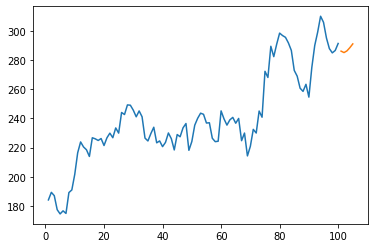

In [ ]:
plt.plot(day_new,scaler.inverse_transform(data_final[1280:]).ravel())
plt.plot(day_pred,scaler.inverse_transform(lst_output))

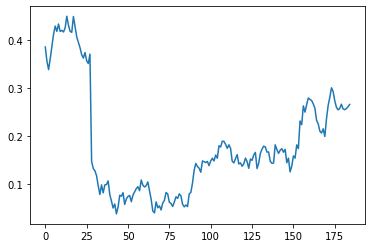

In [ ]:
new_data_final=data_final.tolist()
new_data_final.extend(lst_output)
plt.plot(new_data_final[1200:])

In [ ]:
new_data_final=scaler.inverse_transform(new_data_final).tolist()

The total view of the output.

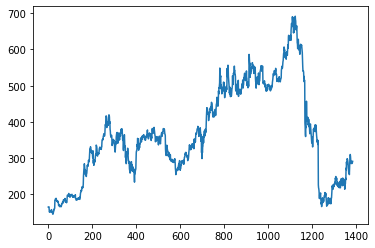

In [ ]:
plt.plot(new_data_final)

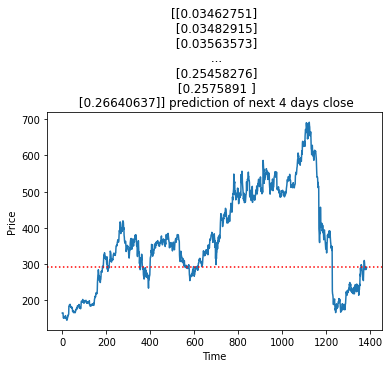

In [ ]:
plt.plot(new_data_final,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next 4 days close".format(data_final))
plt.axhline(y=new_data_final[len(new_data_final)-1], color = 'red', linestyle = ':', label = 'NEXT 5D: {0}'.format(round(float(*new_data_final[len(new_data_final)-1]),2)))

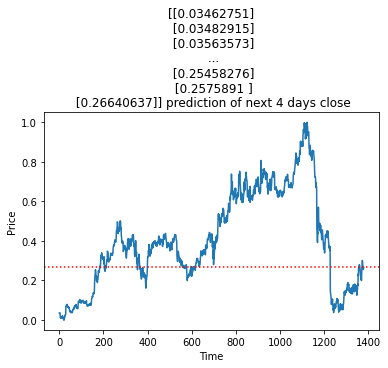

In [ ]:
plt.plot(data_final,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next 4 days close".format(data_final))
plt.axhline(y=data_final[len(data_final)-1], color = 'red', linestyle = ':', label = 'NEXT 5D: {0}'.format(round(float(*data_final[len(data_final)-1]),2)))